# Megaline plan revenue analysis

## Introduction for the project

The goal of this project is to support decision making for an telecommunication company by analyzing the results of two different plans revenues per user. The company needs to decide whether they should invest into marketing the ultimate plan or the surf plan.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats as st
import random
import seaborn as sns

## Open the data files and study the general information

In [2]:
calls=pd.read_csv('/datasets/megaline_calls.csv')
print('calls', calls.head(10))
print()
calls.info()

calls          id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
5  1000_388     1000  2018-12-31      2.20
6  1000_510     1000  2018-12-27      5.75
7  1000_521     1000  2018-12-28     14.18
8  1000_530     1000  2018-12-28      5.77
9  1000_544     1000  2018-12-26      4.40

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [3]:
internet=pd.read_csv('/datasets/megaline_internet.csv')
print('internet', internet.head(10))
print()
internet.info()
internet[internet['user_id']==1000]['mb_used'].sum()

internet          id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
5    1001_0     1001   2018-08-24   284.68
6    1001_3     1001   2018-12-09   656.04
7    1001_4     1001   2018-11-04    16.97
8   1001_10     1001   2018-11-27   135.18
9   1001_15     1001   2018-12-13   761.92

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


1901.47

In [4]:
messages=pd.read_csv('/datasets/megaline_messages.csv')
print('messages', messages.head(10))
print()
messages.info()

messages          id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
5  1000_346     1000   2018-12-29
6  1000_386     1000   2018-12-30
7  1000_413     1000   2018-12-31
8  1000_502     1000   2018-12-27
9  1000_525     1000   2018-12-28

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
plans=pd.read_csv('/datasets/megaline_plans.csv')
print('plans', plans.head(10))
print()
plans.info()

plans    messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [6]:
users=pd.read_csv('/datasets/megaline_users.csv')
print('users', users.head(10))
print()
users.info()


users    user_id first_name  last_name  age                                    city  \
0     1000   Anamaria      Bauer   45   Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28         Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36    Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                           Tulsa, OK MSA   
4     1004    Leonila   Thompson   40         Seattle-Tacoma-Bellevue, WA MSA   
5     1005      Livia    Shields   31     Dallas-Fort Worth-Arlington, TX MSA   
6     1006     Jesusa   Bradford   73  San Francisco-Oakland-Berkeley, CA MSA   
7     1007    Eusebio      Welch   42           Grand Rapids-Kentwood, MI MSA   
8     1008      Emely    Hoffman   53       Orlando-Kissimmee-Sanford, FL MSA   
9     1009      Gerry     Little   19  San Jose-Sunnyvale-Santa Clara, CA MSA   

     reg_date      plan  churn_date  
0  2018-12-24  ultimate         NaN  
1  2018-08-13      surf   

# Prepare the data

## Fixing nans, errors and data types

In [7]:
#fixing call_date column to datetime data type
calls['call_date']= pd.to_datetime(calls['call_date'])
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null datetime64[ns]
duration     137735 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [8]:
#fixing session_date column to datetime data type
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet.info()

    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null datetime64[ns]
mb_used         104825 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [9]:
#fixing message_date column to datetime data type
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [10]:
#fixing nan values on churn_date(it will fix values to 1971)
users['churn_date'] = users['churn_date'].fillna(0)

#fixing reg_date and churn_date column to datetime data type
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null datetime64[ns]
plan          500 non-null object
churn_date    500 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


The precentage of the data where the call duration is 0.0: 19.48%


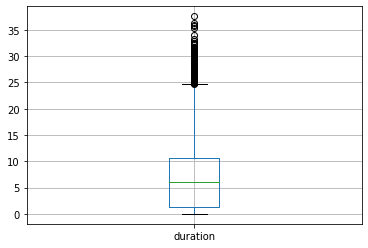

0          9.0
1         14.0
2         15.0
3          6.0
4          5.0
          ... 
137730     9.0
137731    11.0
137732     9.0
137733     1.0
137734    14.0
Name: duration, Length: 137735, dtype: float64


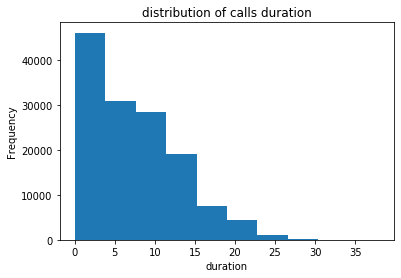

In [11]:
#number of calls where the duration is 0.0
calls[calls['duration'] == 0.0].count()
#precentage of the data where the call duration is 0.0
print('The precentage of the data where the call duration is 0.0: {:.2%}'.format(len(calls[calls['duration'] == 0.0])/len(calls['duration'])))
calls.boxplot('duration')
plt.show()
#rounding call duration up
calls['duration']=np.ceil(calls['duration'])
print(calls['duration'])
#almost 20 percent are 0.0 duration calls, which is alot. it will stay on df.
calls['duration'].plot(kind='hist')
plt.xlabel('duration')
plt.title('distribution of calls duration')
plt.show()



### The number of calls made and minutes used per month

In [12]:
#adding a month column to add the month the call was made
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

#The number of calls made and minutes used per month
calls_pivot = calls.pivot_table('duration', index=['user_id', 'month'], aggfunc=['sum', 'count'])
calls_pivot.reset_index(inplace=True)
calls_pivot

,user_id,month,sum,count
,,,duration,duration
0,1000,12,124.0,16
1,1001,8,182.0,27
2,1001,9,315.0,49
3,1001,10,393.0,65
4,1001,11,426.0,64
...,...,...,...,...
2253,1498,12,339.0,39
2254,1499,9,346.0,41
2255,1499,10,385.0,53


### The number of text messages sent per month per user

In [13]:
# adding a month column to add the month the call was made
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

# The number of text messages sent per month
messages_pivot = messages.pivot_table('message_date', index=['user_id', 'month'], aggfunc='count')
messages_pivot.reset_index(inplace=True)
messages_pivot

,user_id,month,message_date
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


## The volume of data per month per user

In [14]:
# adding a month column to add the month the mb was used
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

# The number of mb used  per month
internet_pivot = internet.pivot_table('mb_used', index=['user_id', 'month'], aggfunc='sum')
internet_pivot.reset_index(inplace=True)
internet_pivot
#rounding mb_used to the upper GB value
def round_mb(row):
    gb_used = row['mb_used']/1024
    return gb_used

    
internet_pivot['gb_used']=internet_pivot.apply(lambda row: round_mb(row), axis=1).apply(np.ceil)
internet_pivot

,user_id,month,mb_used,gb_used
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,22.0
4,1001,11,18504.30,19.0
...,...,...,...,...
2272,1498,12,23137.69,23.0
2273,1499,9,12984.76,13.0
2274,1499,10,19492.43,20.0
2275,1499,11,16813.83,17.0


## The monthly revenue from each user

In [16]:
#merging the 3 pivots
pivot_merge=calls_pivot.merge(messages_pivot, on=['user_id', 'month'], how='outer')
pivot_merge=pivot_merge.merge(internet_pivot, on=['user_id', 'month'], how='outer')
pivot_merge=pivot_merge.merge(users, on=['user_id'], how='outer')

#replacing nan values in message count to 0
pivot_merge['message_date'] = pivot_merge['message_date'].fillna(0)

#dropping un needed columns
pivot_merge.drop(pivot_merge.iloc[:, 2:4], axis=1, inplace=True)

#renaming columns
pivot_merge.columns=['user_id', 'month', 'call_duration', 'call_count', 'text_count',\
                     'mb_used', 'gb_used', 'first_name', 'last_name', 'age', 'city', 'reg_date',\
                     'plan', 'churn_date']
#rounding call_duration up.
#creating a function to calculate user revenue
def user_revenue(row):
    if row['plan']=='ultimate':
        revenue = 70
        if row['call_duration'] > 3000:
            revenue+=(row['call_duration']-3000)*0.01
        if row['text_count'] > 1000:
            revenue +=(row['text_count']-1000)*0.01
        if row['gb_used'] > 30:
            revenue +=(row['gb_used']-30)*7
    else:
        revenue=20
        if row['call_duration'] > 500:
            revenue+=(row['call_duration']-500)*0.03
        if row['text_count'] > 50:
            revenue +=(row['text_count']-50)*0.03
        if row['gb_used'] > 15:
            revenue +=(row['gb_used']-15)*10
    return revenue

#applying the function in the new column 'revenue'
pivot_merge['revenue'] = pivot_merge.apply(lambda row: user_revenue(row), axis=1)

#showing all the users where the revenue from them is more then 0 per month
pivot_merge[pivot_merge['user_id'] ==1008]


/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,user_id,month,call_duration,call_count,text_count,mb_used,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,revenue
26,1008,10.0,476.0,71.0,21.0,17106.99,17.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,1970-01-01,70.0
27,1008,11.0,446.0,63.0,37.0,23676.72,24.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,1970-01-01,70.0
28,1008,12.0,634.0,85.0,26.0,14689.33,15.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,1970-01-01,70.0


# Step 3. Analyze the data

Describing the customers' behavior. Finding the minutes, texts, and volume of data the users of each plan require per month. Calculating the mean, dispersion, and standard deviation. Plotting histograms. Describing the distributions.

In [ ]:
print(pivot_merge.describe())
pivot_merge.describe(include=object)
pivot_merge.info()

After the merges we have nan values across 5 columns: 'month', 'call_duration', 'call_count', 'mb_used' and 'gb_used'. We can replace them with 0.

In [ ]:
#checking why the month column has nan
pivot_merge[pivot_merge['month'].isna()]
# becasue all the columns are empty it can be dropped as there is only 10 rows
pivot_merge = pivot_merge[pivot_merge['month'].notna()]
#the rest of the nan values can be replaced with 0
pivot_merge=pivot_merge.fillna(0)
pivot_merge.info()

In [ ]:
# the mean of minutes, texts, and volume of data the users of each plan require per month.
print(pivot_merge.groupby(['plan', 'month'])['call_duration', 'text_count','mb_used'].sum())

#bar plot for call duration
pivot_merge.pivot_table(index='month', columns='plan', values='call_duration',
                aggfunc='sum', fill_value=0).plot.bar()
plt.ylabel('call_duration')

#bar plot for text count
pivot_merge.pivot_table(index='month', columns='plan', values='text_count',
                aggfunc='sum', fill_value=0).plot.bar()
plt.ylabel('text_count')
#bar plot for mb used
pivot_merge.pivot_table(index='month', columns='plan', values='mb_used',
                aggfunc='sum', fill_value=0).plot.bar()
plt.ylabel('mb_used')

plt.show()

We can clearly see a pattern where each parameter is increasing per month for both surf and ultimate plan users, and the surf plan users are using more calls, text and mb then ultimate plan users except January.
Next we should find the mean for each plan, as there are more surf plan users then ultimate.

In [ ]:
#bar plot for mean call duration
pivot_merge.pivot_table(index='month', columns='plan', values='call_duration',
                aggfunc='mean', fill_value=0).plot.bar(title='mean call duration')
plt.ylabel('call_duration')

#bar plot for mean text count
pivot_merge.pivot_table(index='month', columns='plan', values='text_count',
                aggfunc='mean', fill_value=0).plot.bar(title='mean text count')
plt.ylabel('text_count')

#bar plot for mean mb used
pivot_merge.pivot_table(index='month', columns='plan', values='gb_used',
                aggfunc='mean', fill_value=0).plot.bar(title='mean gb used')
plt.ylabel('gb_used')
plt.show()

We can clearly see that the average call duration for surf and ultimate plans do not differe greatly each month except Feburary where ultimate plan users call duration is unusally greater then surf plan users. We can also deduct that ultimate plan users text more then surf plan users on each month. In addition ultimate plan users average gb_used is similar to surf plan users except Feburary, March and April where ultimate plan users use more mb then surf plan users.

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.distplot(pivot_merge[pivot_merge['plan']=='surf']['call_duration'], ax=axes[0])
sns.distplot(pivot_merge[pivot_merge['plan']=='ultimate']['call_duration'], ax=axes[0])
ax = sns.boxplot(x="plan", y='call_duration', data=pivot_merge)
plt.show()
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.distplot(pivot_merge[pivot_merge['plan']=='surf']['gb_used'], ax=axes[0])
sns.distplot(pivot_merge[pivot_merge['plan']=='ultimate']['gb_used'], ax=axes[0])
ax = sns.boxplot(x="plan", y='gb_used', data=pivot_merge)
plt.show()
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.distplot(pivot_merge[pivot_merge['plan']=='surf']['text_count'], ax=axes[0])
sns.distplot(pivot_merge[pivot_merge['plan']=='ultimate']['text_count'], ax=axes[0])
ax = sns.boxplot(x="plan", y='text_count', data=pivot_merge)

In [ ]:
#calculating dispersion
print(pivot_merge['revenue'].describe())
print()
print('The revenue variance is:', pivot_merge['revenue'].var())
pivot_merge['revenue'].plot(kind='hist', bins=50)
plt.show()
pivot_merge['revenue'].plot(kind='hist', bins=50, range=(0, 100))
plt.xlabel('revenue')
plt.ylabel('Number of users')
plt.show()

# Step 4. Test the hypotheses

* The average revenue from users of Ultimate and Surf calling plans differs.
* The average revenue from users in NY-NJ area is different from that of the users from other regions.

I will use the ttest here as we need to check the statistical hypothesis on the equality of two population means. To check for statistical difference an alpha of 0.05 will be used.

In [ ]:
#bar plot for revenue
pivot_merge.pivot_table(index='month', columns='plan', values='revenue',
                aggfunc='mean', fill_value=0).plot.bar(title='revenue')
plt.ylabel('revenue')
plt.show()
print('The average revenue from surf customer is:', pivot_merge[pivot_merge['plan']=='surf']['revenue'].mean())
print('The average revenue from ultimate customer is:', pivot_merge[pivot_merge['plan']=='ultimate']['revenue'].mean())
print()
total_revenue_surf=pivot_merge[pivot_merge['plan']=='surf']['revenue']\
      .mean()*len(pivot_merge[pivot_merge['plan']=='surf'])
total_revenue_ultimate=pivot_merge[pivot_merge['plan']=='ultimate']['revenue']\
      .mean()*len(pivot_merge[pivot_merge['plan']=='ultimate'])
print('The total average revenue from all surf customers is:', total_revenue_surf)
print('The total average revenue from all ultimate customers is:', total_revenue_ultimate)
print('The precentage difference between surf and ultimate plans: {:.2%}'.format((total_revenue_surf-total_revenue_ultimate)/total_revenue_ultimate))

#checking the hypotesis that they differe

revenue_surf_list=pivot_merge[pivot_merge['plan']=='surf']['revenue'].round(2).to_list()
revenue_ultimate_list=pivot_merge[pivot_merge['plan']=='ultimate']['revenue'].round(2).to_list()
print()

# creating an equal sized lists of random values
random_surf=random.sample(revenue_surf_list,120)
random_ultimate=random.sample(revenue_ultimate_list,120)

alpha = 0.05

results = st.ttest_ind(random_surf, random_ultimate)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

print()
#number of ultimate customers that exceeded their ultimate plan limits
print('number of ultimate customers that exceeded their ultimate plan limits:',\
      len(pivot_merge[pivot_merge['revenue'] > 70]))
#number of surf customers that exceeded their surf plan limits
print('number of surf customers that exceeded their surf plan limits:',\
      len(pivot_merge[(pivot_merge['revenue'] > 20) & (pivot_merge['plan'] == 'surf')]))


As can be seen there are 531 customers that exceeded their ultimate plan, but there are 1142 customers that exceeded their surf plan. However, in total, the average revenue per total customers is 83.40% larger in the surf plan. 

Checking the numbers using ttest we can see that we reject the null hypothesis which means that we can conclude that there is a statistical difference between the average revenue streams.

In [ ]:
avr_revenue_NY_NJ=pivot_merge[pivot_merge['city'].str.contains('NY-NJ')]['revenue'].mean()
print('The average revenue for customers from NY-NJ area is:', avr_revenue_NY_NJ)
avr_revenue_not_NY_NJ=pivot_merge[~pivot_merge['city'].str.contains('NY-NJ')]['revenue'].mean()
print('The average revenue for customers not from NY-NJ area is:', avr_revenue_not_NY_NJ)

NY_NJ_list=pivot_merge[pivot_merge['city'].str.contains('NY-NJ')]['revenue'].to_list()
not_NY_NJ_list=pivot_merge[~pivot_merge['city'].str.contains('NY-NJ')]['revenue'].to_list()

print()
random_NY_NJ=random.sample(NY_NJ_list,120)
random_not_NY_NJ=random.sample(not_NY_NJ_list,120)

alpha = 0.05

results = st.ttest_ind(random_NY_NJ, random_not_NY_NJ)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

Compering the two revenue streams using ttest we can see that we can't reject the null hypothesis which means that we can conclude that there isn't a statistical difference between the mean revenue streams.

# Step 5. Overall conclusion

Steps taken:
1. Loaded all CVTs and examine them for Nan, wrong values and wrong data types. I found Nan values in churn date, and replace them with generic datetime format. All date columns data types were changed to datetime format. I decided to keep calls with 0.0 time as they are about 20% of the data and are not included as outliers in the boxplot.

2. Next I have created pivot tables for the different CVTs, indexed by user_id and month. Then I have merged them to a complete df with columns:'user_id', 'month', 'call_duration', ' call_count','text_count', 'mb_used', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan', 'churn_date'.

3. With the complete df I was able to create a new column 'revenue' where it is shown the revenue from each user per month. Next I looked at the mean of call_duration, text and mb used between the two plans, and concluded that they don't differe greatly except that ultimate plan users text more then surf plan users.

4. I have checked that the revenue from both plans have statistical difference. The conclusion was that there is statistical difference between ultimate and surf, and that surf plan revenue is 83% higher. Also there isn't a statistical differrence between mean revenues from NY-NJ area mean revenues from users not from NY-NJ area.

5. In conclusion seems that the marketing efforts should focus on marketing the surf plan as there is more revenue coming from this plan compared with the ultimate plan.